<a href="https://colab.research.google.com/github/Dcastor21/100-days-of-python/blob/main/brain-tumor-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 149M/149M [00:07<00:00, 22.6MB/s]
100% 149M/149M [00:07<00:00, 20.0MB/s]


In [3]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        classes.append(label)
        class_paths.append(image_path)
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [4]:
tr_df = get_class_paths("/content/Training")

In [5]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_0255.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0182.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0553.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0380.jpg,glioma


In [6]:
ts_df = get_class_paths("/content/Testing")
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0097.jpg,notumor
1,/content/Testing/notumor/Te-no_0301.jpg,notumor
2,/content/Testing/notumor/Te-noTr_0000.jpg,notumor
3,/content/Testing/notumor/Te-no_0222.jpg,notumor
4,/content/Testing/notumor/Te-no_0139.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0280.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0163.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0194.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0146.jpg,glioma


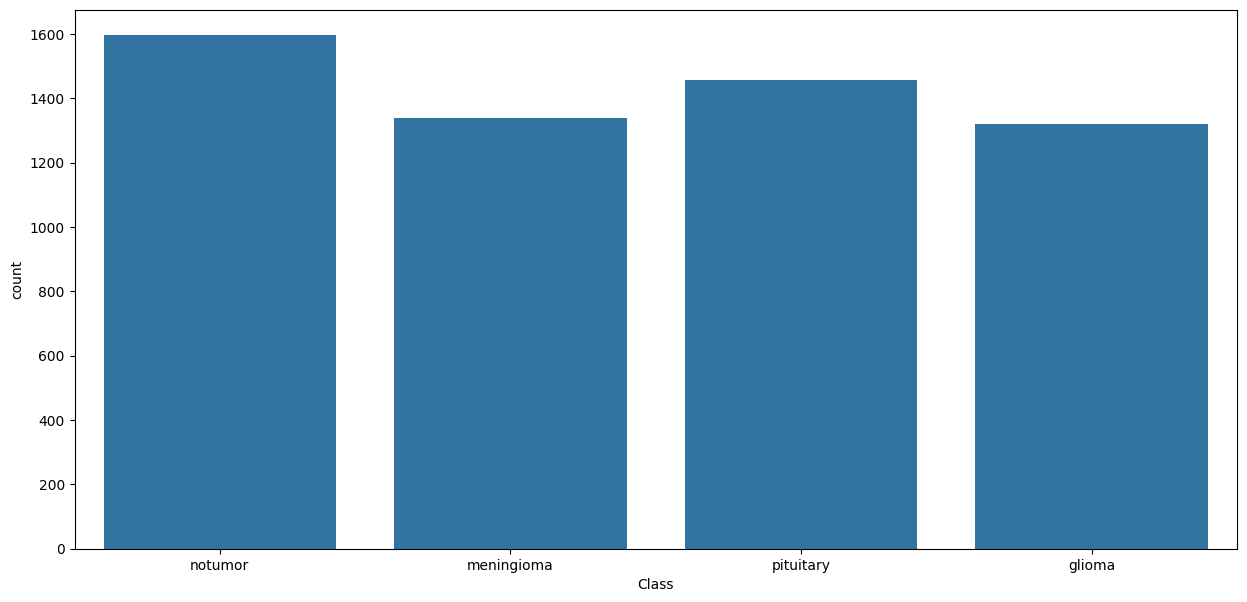

In [7]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

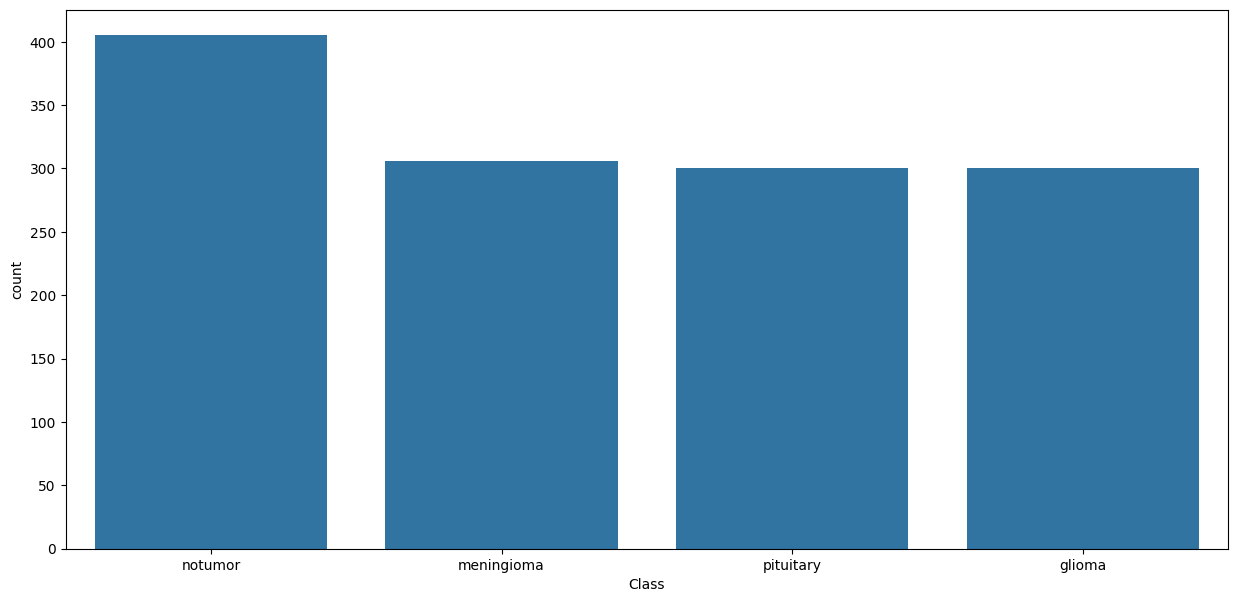

In [8]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [10]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [11]:
valid_df

,Class Path,Class
497,/content/Testing/meningioma/Te-meTr_0006.jpg,meningioma
1169,/content/Testing/glioma/Te-gl_0253.jpg,glioma
665,/content/Testing/meningioma/Te-me_0143.jpg,meningioma
601,/content/Testing/meningioma/Te-me_0156.jpg,meningioma
964,/content/Testing/pituitary/Te-pi_0033.jpg,pituitary
...,...,...
686,/content/Testing/meningioma/Te-me_0065.jpg,meningioma
582,/content/Testing/meningioma/Te-me_0212.jpg,meningioma
119,/content/Testing/notumor/Te-no_0373.jpg,notumor
727,/content/Testing/pituitary/Te-pi_0168.jpg,pituitary


In [12]:
ts_df

,Class Path,Class
1227,/content/Testing/glioma/Te-gl_0134.jpg,glioma
1100,/content/Testing/glioma/Te-gl_0293.jpg,glioma
1011,/content/Testing/glioma/Te-gl_0164.jpg,glioma
6,/content/Testing/notumor/Te-no_0064.jpg,notumor
1080,/content/Testing/glioma/Te-gl_0215.jpg,glioma
...,...,...
369,/content/Testing/notumor/Te-no_0390.jpg,notumor
210,/content/Testing/notumor/Te-no_0391.jpg,notumor
985,/content/Testing/pituitary/Te-pi_0241.jpg,pituitary
972,/content/Testing/pituitary/Te-pi_0287.jpg,pituitary


In [13]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [14]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)
valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)
ts_gen = image_generator.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size,
                                             shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


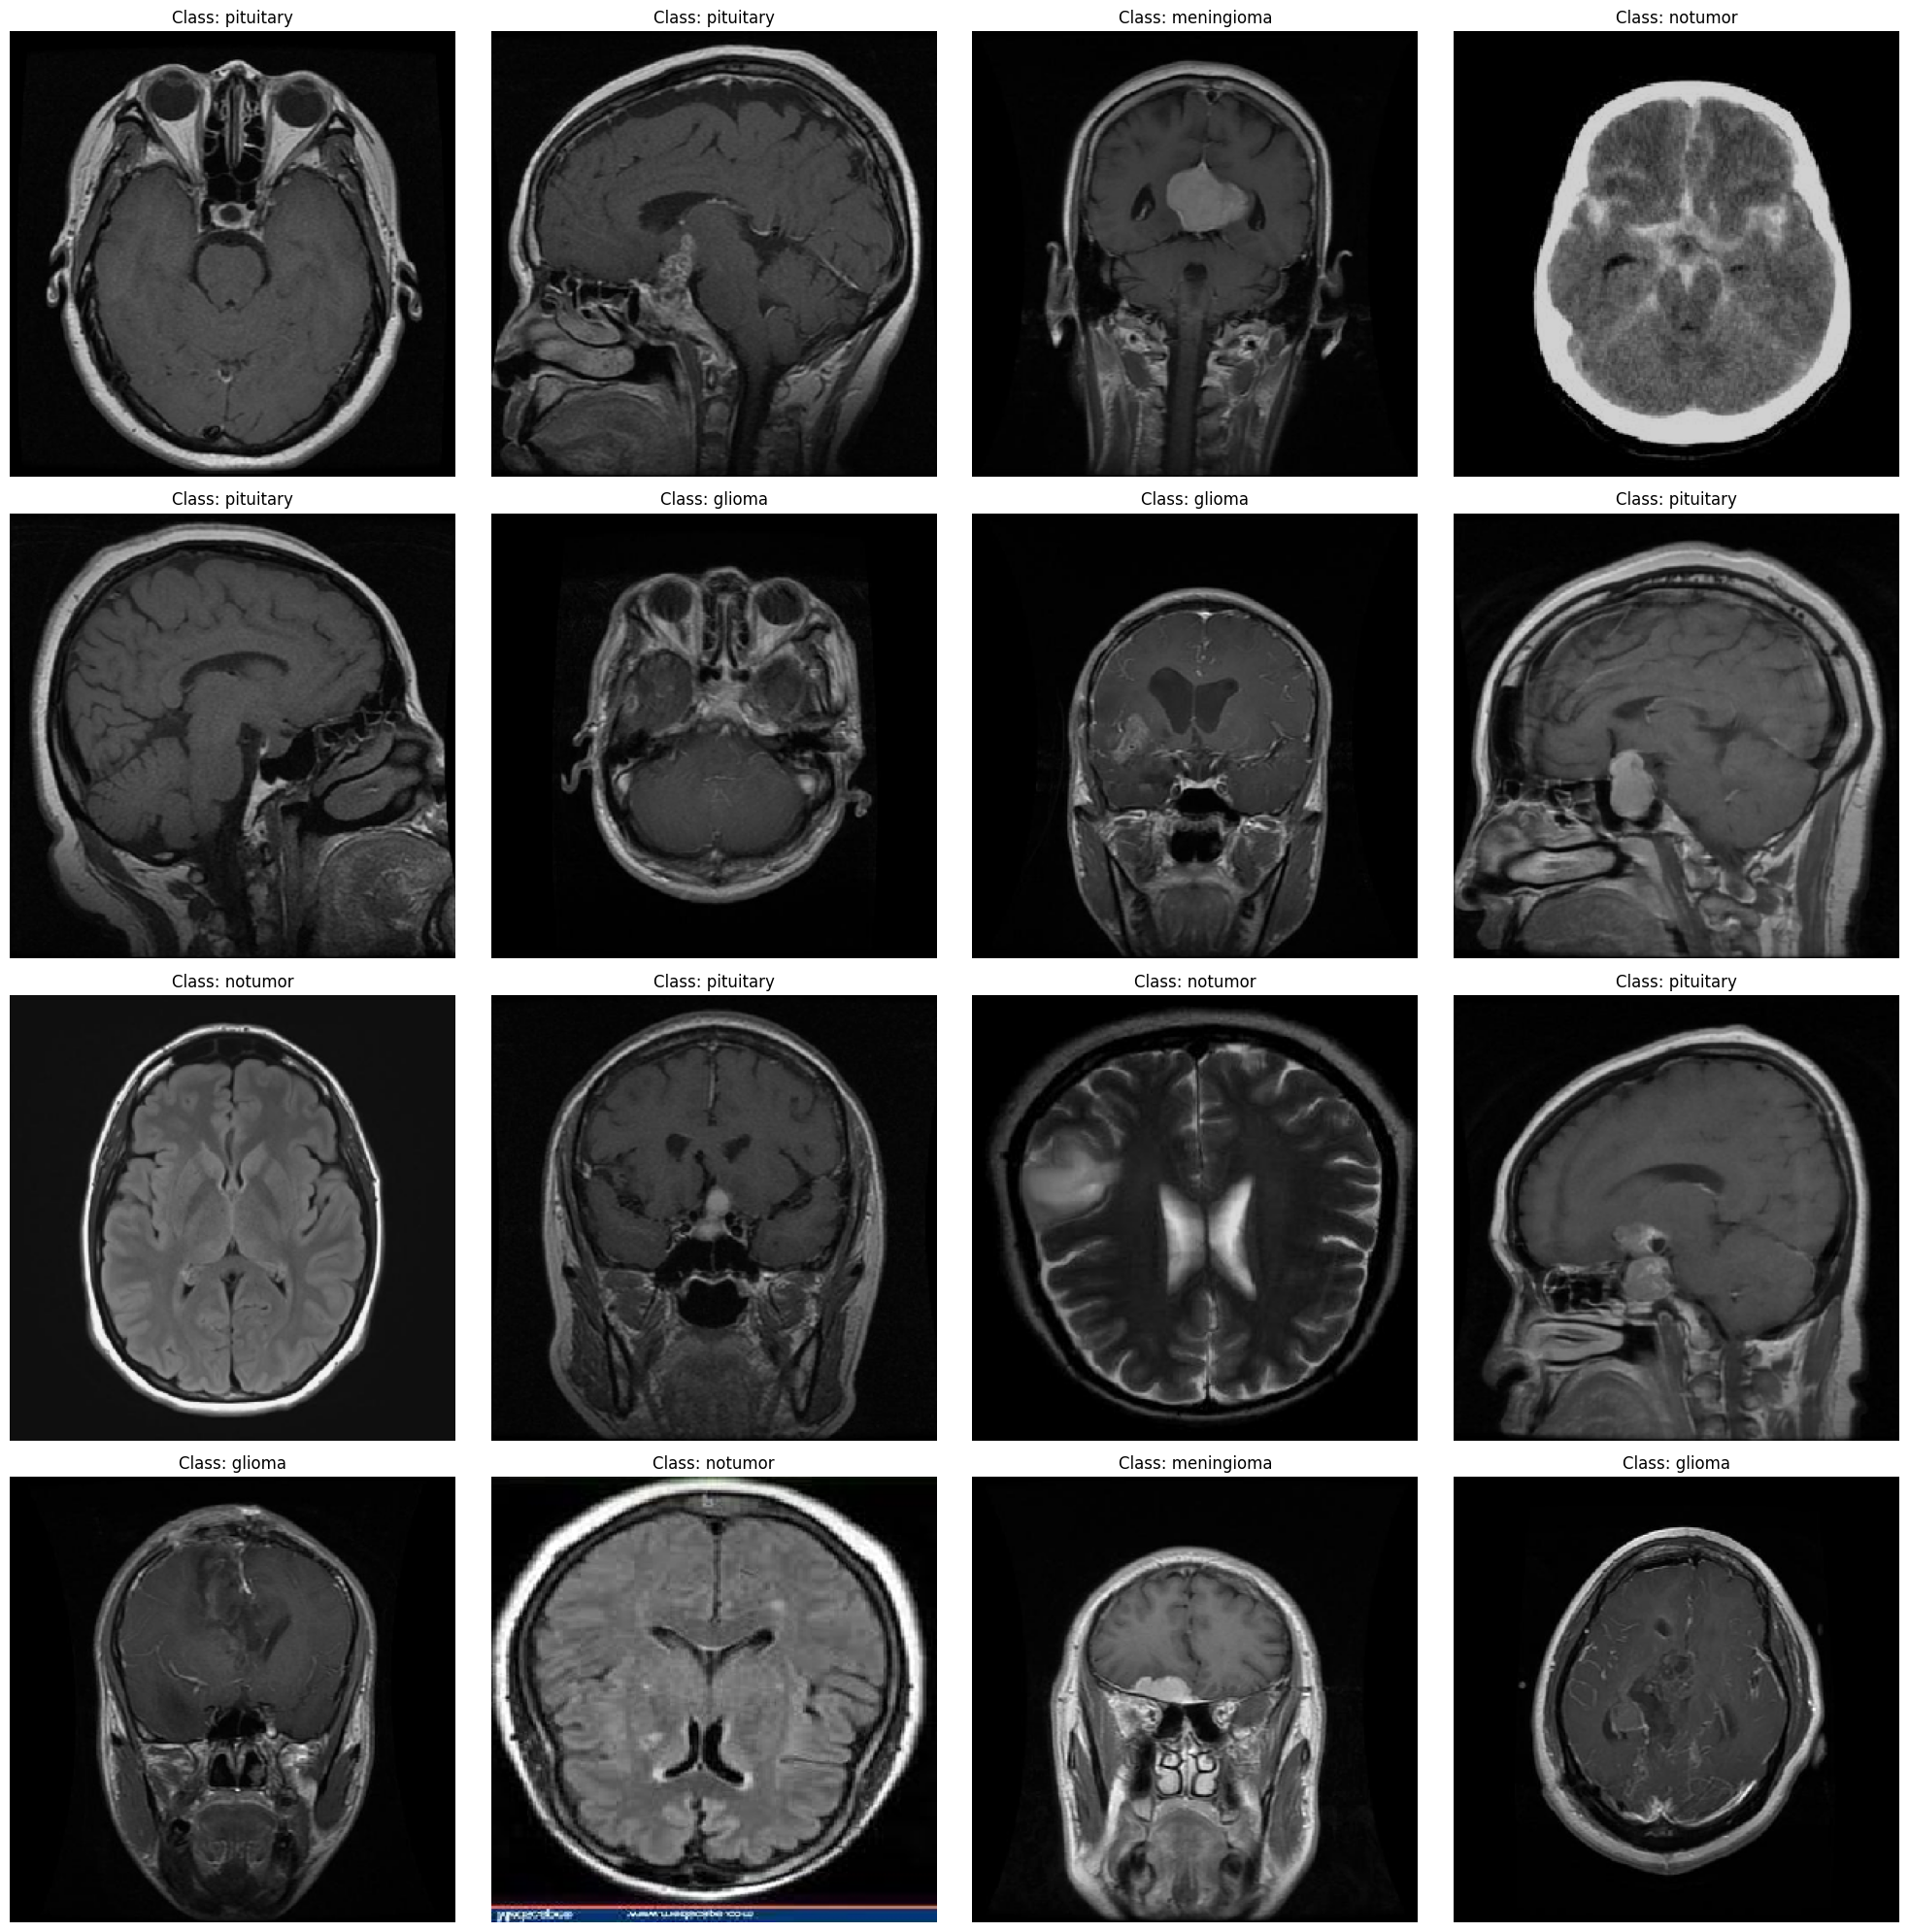

In [15]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  index_position = class_indices.index(class_index)
  class_name = class_names[index_position]
  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights="imagenet",
                                            input_shape=img_shape,
                                            pooling='max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [17]:
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

In [18]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 298s 1s/step - accuracy: 0.7451 - loss: 0.7378 - precision: 0.8288 - recall: 0.6386 - val_accuracy: 0.9405 - val_loss: 0.1560 - val_precision: 0.9433 - val_recall: 0.9389
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 213s 934ms/step - accuracy: 0.9732 - loss: 0.0782 - precision: 0.9746 - recall: 0.9713 - val_accuracy: 0.9634 - val_loss: 0.0989 - val_precision: 0.9648 - val_recall: 0.9634
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 163s 901ms/step - accuracy: 0.9887 - loss: 0.0333 - precision: 0.9893 - recall: 0.9885 - val_accuracy: 0.9863 - val_loss: 0.0541 - val_precision: 0.9863 - val_recall: 0.9863
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 904ms/step - accuracy: 0.9940 - loss: 0.0173 - precision: 0.9940 - recall: 0.9937 - val_accuracy: 0.9618 - val_loss: 0.0929 - val_precision: 0.9633 - val_recall: 0.9618
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 168s 930ms/step - accuracy: 0.9948 - loss: 0.0167 - precision: 0.9949 - recall: 0.9941 - val_accuracy: 0.9908 - val_loss: 

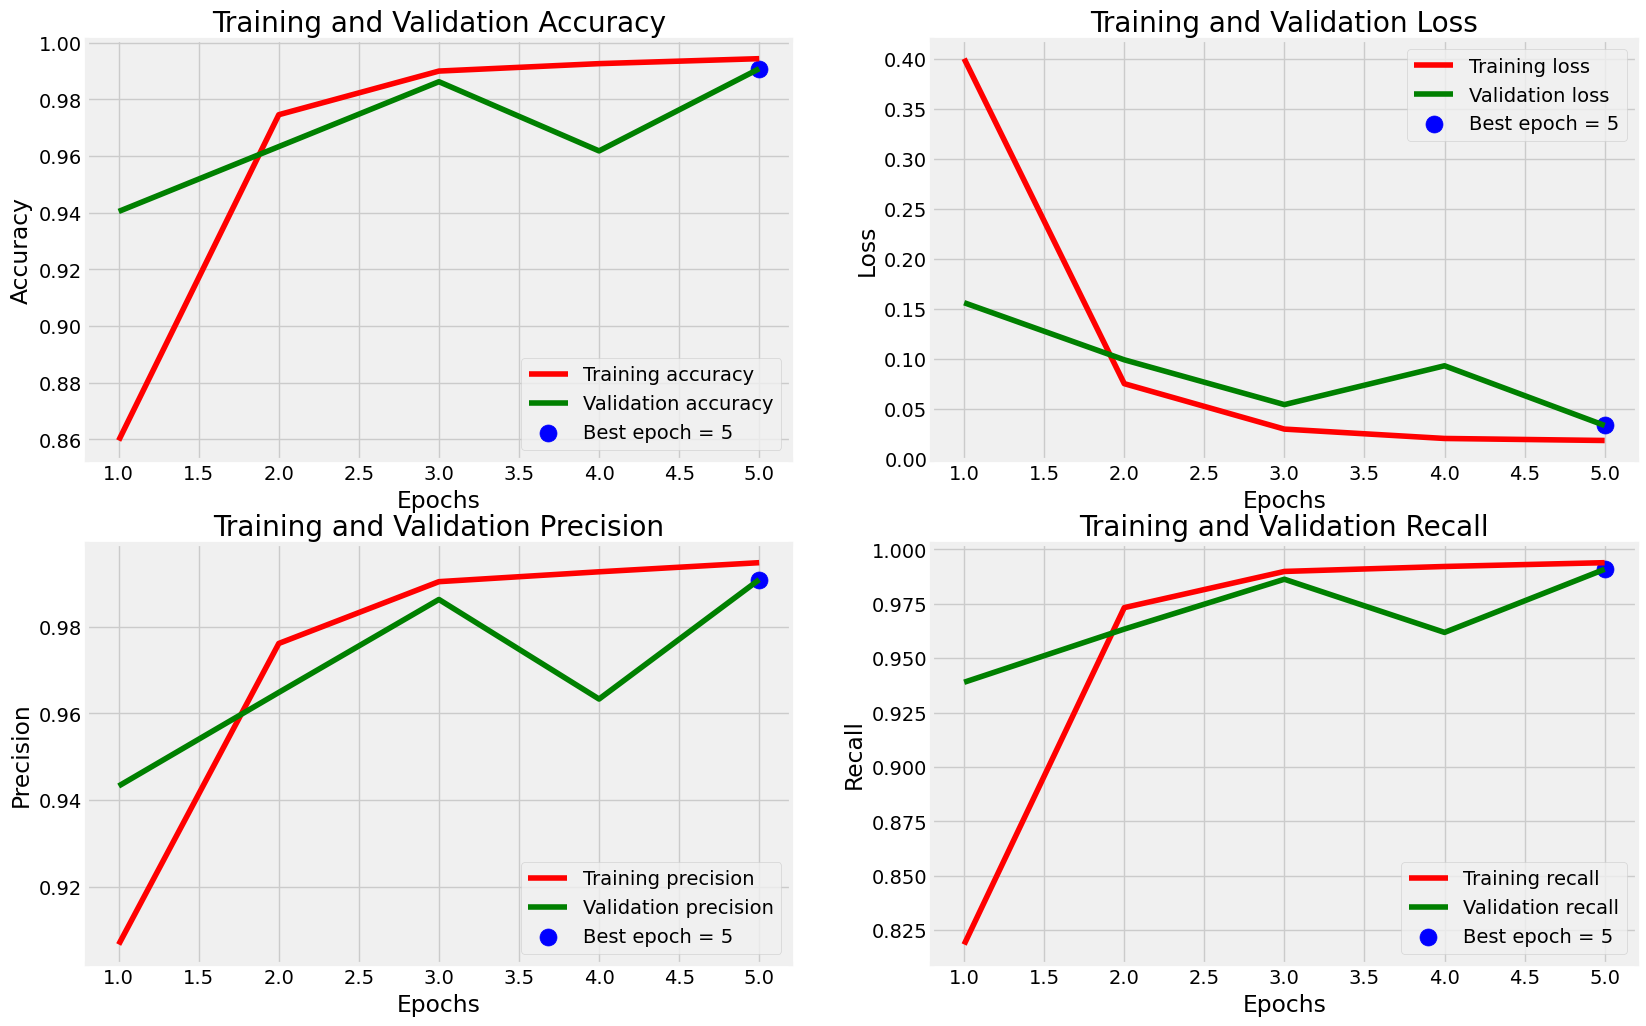

In [19]:
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')


  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

# plt.subTitle('Model Training Metrics Over Epochs', fontize=16)
plt.show()

In [20]:
train_score = model.evaluate(tr_gen, verbose = 1)
valid_score = model.evaluate(valid_gen, verbose = 1)
test_score = model.evaluate(ts_gen, verbose = 1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 48s 269ms/step - accuracy: 0.9975 - loss: 0.0058 - precision: 0.9977 - recall: 0.9975
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step - accuracy: 0.9912 - loss: 0.0218 - precision: 0.9912 - recall: 0.9912
 1/41 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - accuracy: 1.0000 - loss: 9.0847e-05 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.9826 - loss: 0.0687 - precision: 0.9826 - recall: 0.9826
Train Accuracy: 99.74%
Train Loss: 0.0068


Validation Accuracy: 98.63
Validation Loss: 0.0326


Test Accuracy: 97.41
Test Loss: 0.0816


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step


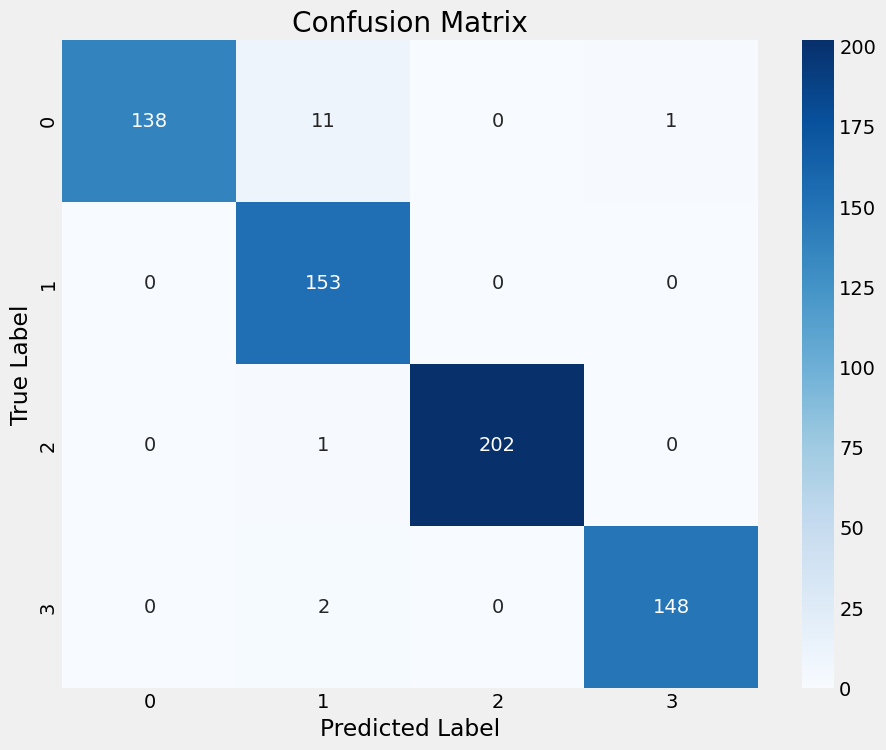

In [21]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [22]:
from PIL import Image

def predict(img_path: str) -> None:
  labels = list(class_dict.keys())
  plt.figure(figsize=(6, 8))
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  predictions = model.predict(img_array)
  probabilities = list(predictions[0])
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")
  plt.tight_layout()
  plt.show()
  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


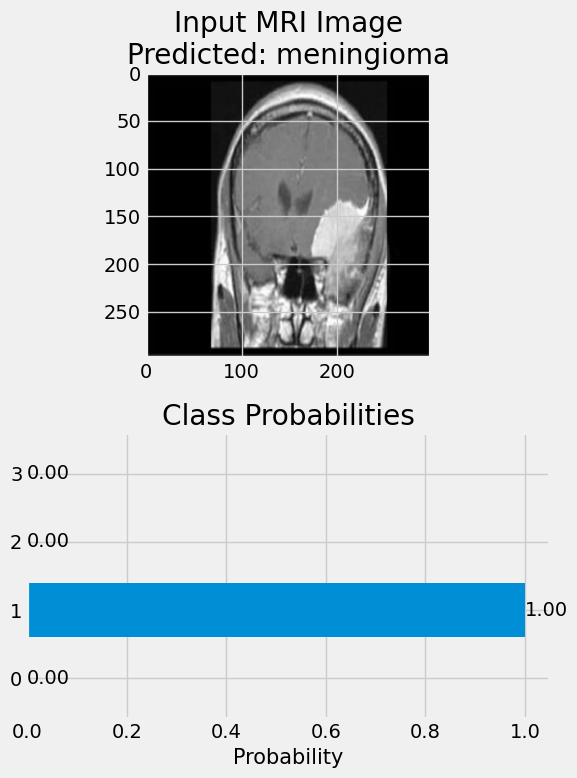


Predicted tumor type: meningioma


In [23]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


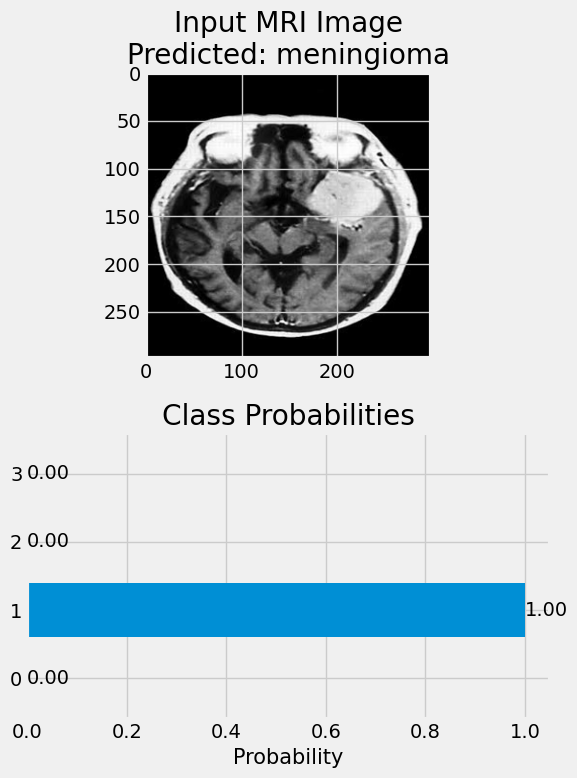


Predicted tumor type: meningioma


In [24]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


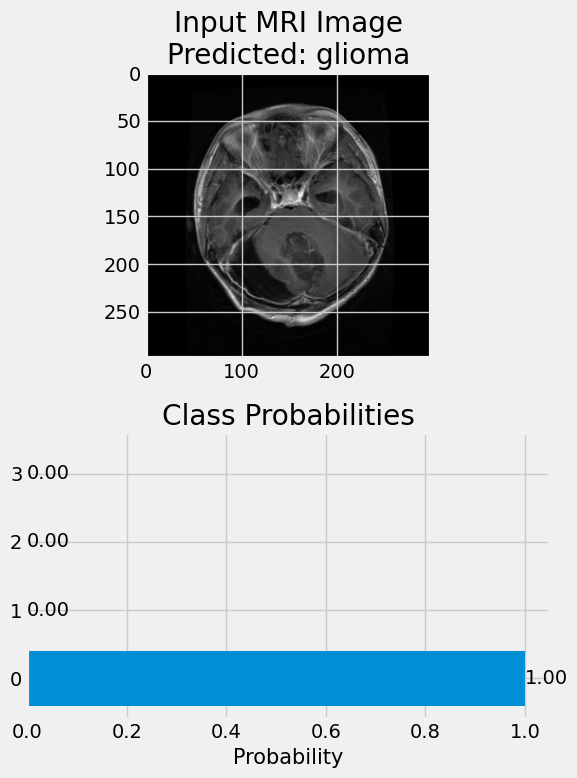


Predicted tumor type: glioma


In [25]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [26]:
model.save_weights("xception_model.weights.h5")

In [27]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [28]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)
valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)
ts_gen = image_generator.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size,
                                             shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [33]:
cnn_model = Sequential()

cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))
cnn_model.add(Dense(4, activation='softmax'))


cnn_model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'precision', 'recall'])

cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 117s 316ms/step - accuracy: 0.5642 - loss: 2.3348 - precision: 0.6750 - recall: 0.3846 - val_accuracy: 0.7237 - val_loss: 0.9486 - val_precision: 0.7637 - val_recall: 0.6611
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 139s 314ms/step - accuracy: 0.8171 - loss: 0.7324 - precision: 0.8394 - recall: 0.7865 - val_accuracy: 0.7786 - val_loss: 0.6959 - val_precision: 0.8059 - val_recall: 0.7481
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 140s 309ms/step - accuracy: 0.8659 - loss: 0.5373 - precision: 0.8792 - recall: 0.8460 - val_accuracy: 0.8153 - val_loss: 0.5923 - val_precision: 0.8229 - val_recall: 0.8015
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 110s 306ms/step - accuracy: 0.8865 - loss: 0.4584 - precision: 0.8977 - recall: 0.8760 - val_accuracy: 0.8885 - val_loss: 0.4455 - val_precision: 0.9016 - val_recall: 0.8809
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 110s 308ms/step - accuracy: 0.9092 - loss: 0.3895 - precision: 0.9175 - recall: 0.9023 - val_accuracy: 0.9069

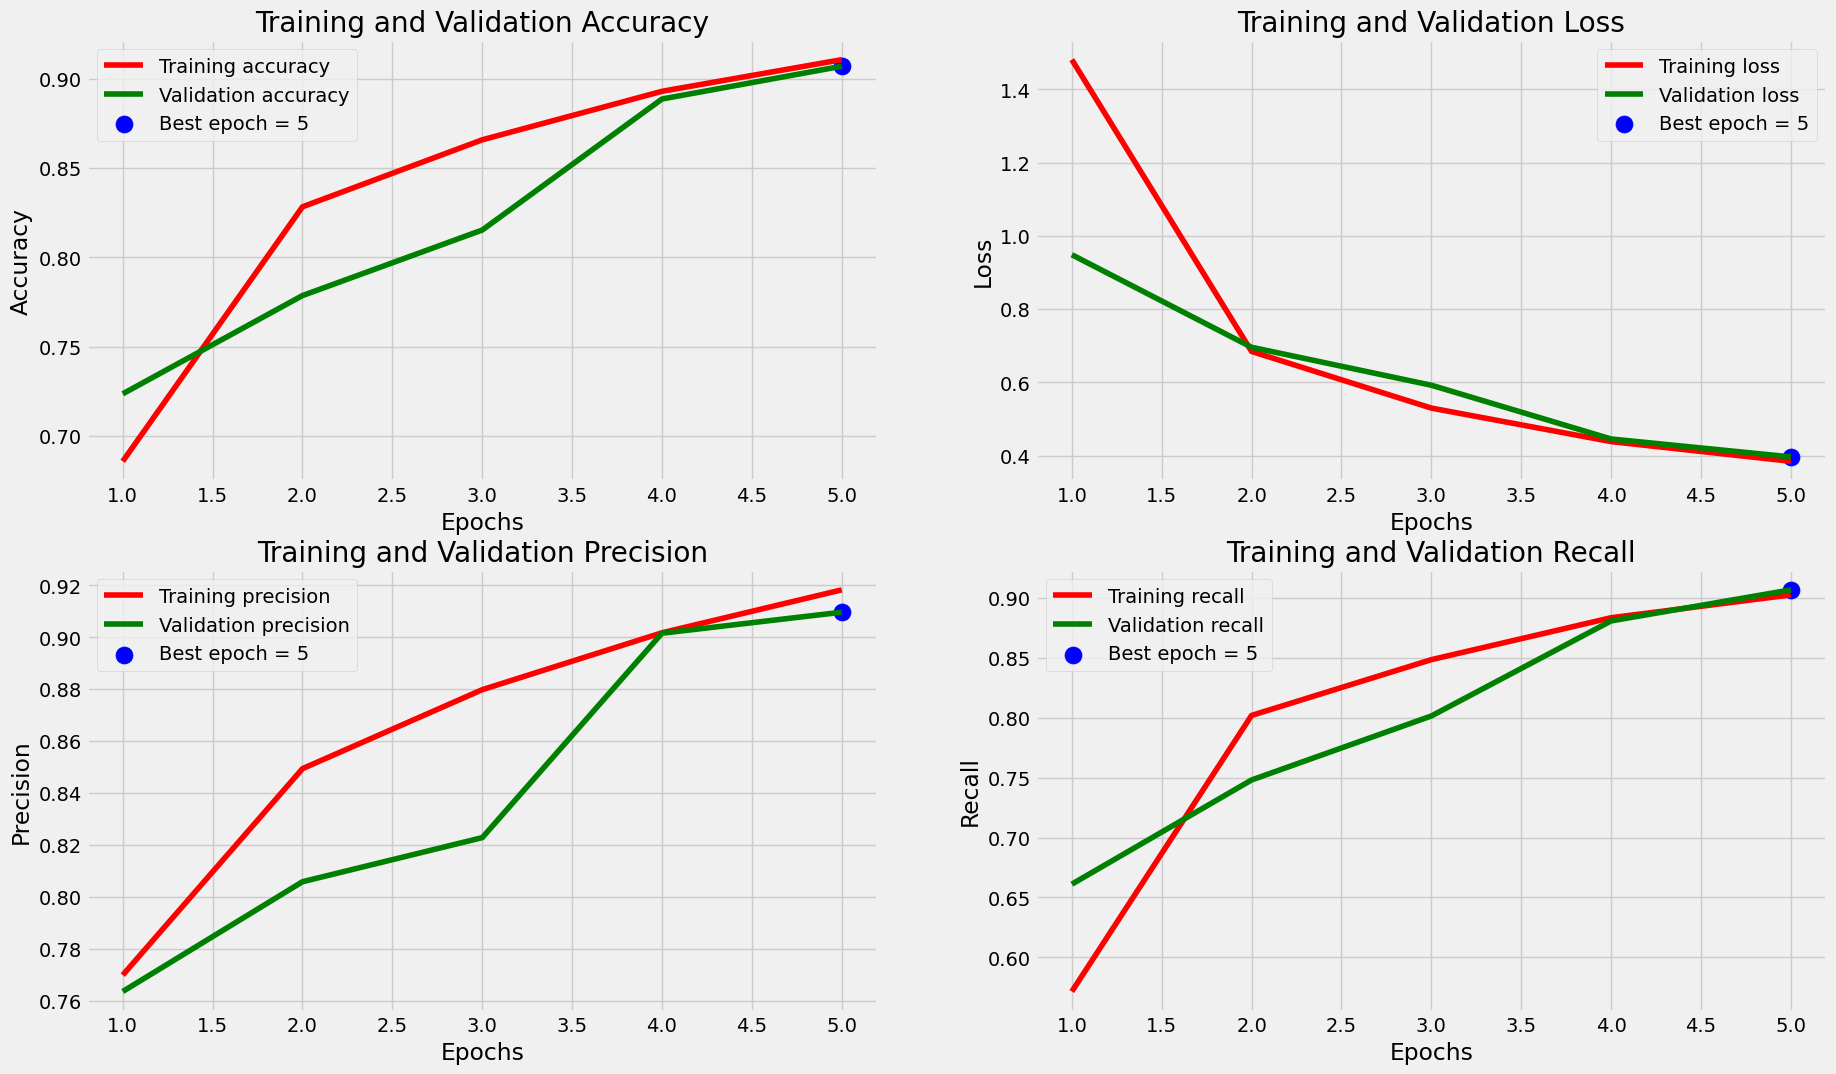

In [35]:
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')


  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

# plt.subtitle('Model Training Metrics Over Epochs', fontize=16)
plt.show()

In [36]:
train_score = cnn_model.evaluate(tr_gen, verbose = 1)
valid_score = cnn_model.evaluate(valid_gen, verbose = 1)
test_score = cnn_model.evaluate(ts_gen, verbose = 1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.9520 - loss: 0.2826 - precision: 0.9549 - recall: 0.9480
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.8938 - loss: 0.3931 - precision: 0.8975 - recall: 0.8938
 2/41 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9062 - loss: 0.3108 - precision: 0.9062 - recall: 0.9062 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9180 - loss: 0.3618 - precision: 0.9176 - recall: 0.9128
Train Accuracy: 95.27%
Train Loss: 0.2796


Validation Accuracy: 90.38
Validation Loss: 0.3944


Test Accuracy: 91.62
Test Loss: 0.3870


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step


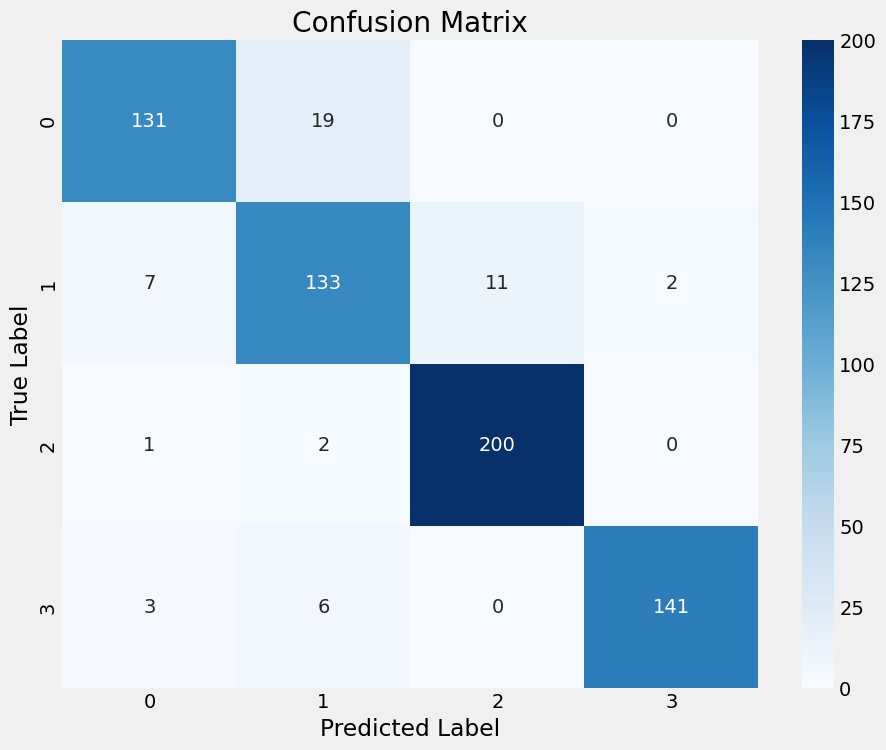

In [37]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       150
           1       0.83      0.87      0.85       153
           2       0.95      0.99      0.97       203
           3       0.99      0.94      0.96       150

    accuracy                           0.92       656
   macro avg       0.92      0.92      0.92       656
weighted avg       0.92      0.92      0.92       656



In [39]:
cnn_model.save("cnn_model.h5")

# Streamlit app

In [40]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [41]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata


In [ ]:
ngrok_token = userdata.get('NGROK_AUTH_KEY')

ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
%%Write File app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import ploty.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_env
load_dotenv()

def load_xception_model(model_path):
  img_shape =(299,299,3)
  base_model = tf.keras.applicationsXception(include_top = False, weights = "imagenet", input_shape = img_shape, pooling = "max")

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate= 0.25),
      Dense (4, activation = 'softmax')
  ])

  model.build((None,) + imag_shape)

  model.compile(Adamax(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy', 'percision', 'recall'])

  model.load_weights(model_path)

  return model


st.title("Brain Tumor Classification")

st.write("upload an image of a brain MRI to classify the tumor type")

uploaded_file + st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception", "Custom CNN")
  )

  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model("/content/xception_model.weights.h5")
    img_size = (299, 299)
  else:
    model = load_cnn_model("/content/cnn_model.h5")
    img_size = (224, 224)

    labels = ["Glioma", 'Meningioma', ' no tumor', 'pituitary']
    img = image.load_img(uploaded_file, target_size = img_size)
    img_array = image.img_to_array (img)
    img_array = np.expand_dims(img_array, axis = 0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    class_index = np. argmax(prediction[0])
    result = labels[class_index]

    st.write(f"Predicted Class: {result}")
    st.write{"Predictions:"}
    for label, prob in zip(labels,prediction[0]):
      st.write(f"{label} : {probs:.4f}")


In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
public_url = nrok.connect(addr ='8501', proto = 'http', bind_tls=True)
print(f'Public URL: {public_url}')

In [ ]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config[addr]}")
  ngrok.disconnect(tunnel.public_url)